# 期末报告 3路低频谱旁瓣频分复用 FDM-LS-TR

学号: ________   姓名:________  日期:________ 成绩:________

- 同时在不同的频带上传输2路信号，旁瓣要尽可能的小，如: 10Hz带外辐射小于 -40 dB。

## 发送机

In [7]:
# 系统参数
import numpy as np
import pylab as pl
from helper import plot_spec, plot_wave, rand_bits
P = 100
Ti = 1/P
beta= 0.25
fc1 = 10
fc2 = 15 #% fc2 设置为多少合适?
fc3 = 20

In [8]:
fc2 - fc1 >= 1 + beta
fc3 - fc2 >= 1 + beta

True

### Sender 1

利用 ``pam_transmitter()`` 实现单路升余弦滤波成形的幅度调制通信系统。

0000110001011000


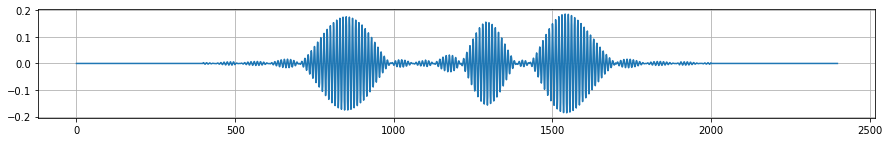

In [12]:
from helper import pam_transmitter 
bits_1 = rand_bits(16)
#<<<
wave_1 = pam_transmitter(bits_1, beta=beta, fc=fc1)
#>>>
pl.figure(figsize=(15, 2)); pl.plot(wave_1); pl.grid();
print(bits_1)

### Sender 2

0010010100001010


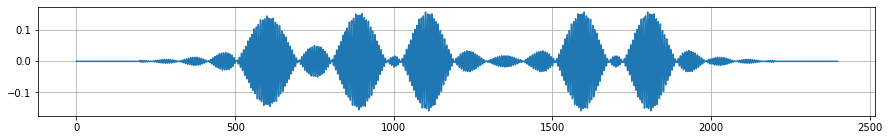

In [13]:
bits_2 = rand_bits(16)
#<<<
wave_2 = pam_transmitter(bits_2, beta=beta, fc=fc2)
#>>>
pl.figure(figsize=(15, 2)); pl.plot(wave_2); pl.grid();
print(bits_2)

0011001100011100


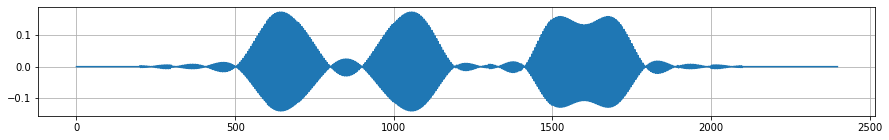

In [16]:
bits_3 = rand_bits(16)
#<<<
wave_3 = pam_transmitter(bits_3, beta=beta, fc=fc3)
#>>>
pl.figure(figsize=(15, 2)); pl.plot(wave_3); pl.grid();
print(bits_3)

## 发送信号

两路信号在信道中是合在一起的

### 时域波形

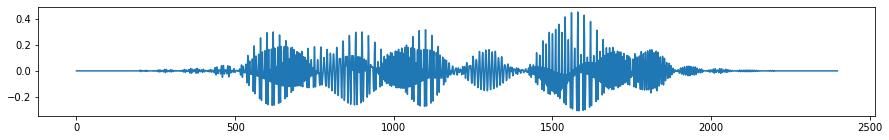

In [17]:
send_wave = wave_1 + wave_2 + wave_3

pl.figure(figsize=(15, 2)); pl.plot(send_wave);

- wave_1、wave_2、send_wave 时域之间的关系？
- 两路信号合并是否会互相干扰，影响接收端接收? 如果要不相互干扰，需要满足什么条件?

### 频谱

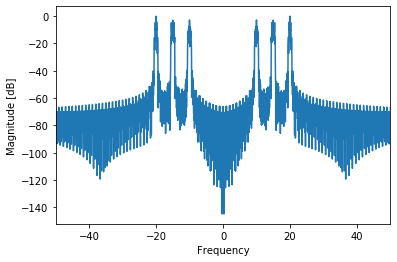

In [18]:
plot_spec(send_wave, 1/P);

频谱旁瓣是否比 BASK-FDM 系统更低？低多少?

**分别绘制 wave_1、 wave_2 的频谱**

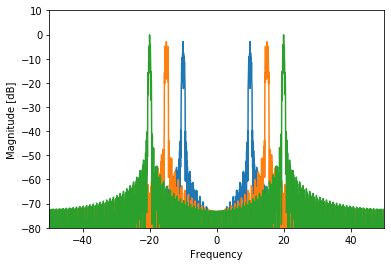

In [20]:
plot_spec(wave_1, 1/P);
plot_spec(wave_2, 1/P, ylim=[-80, 10]);
plot_spec(wave_3, 1/P, ylim=[-80, 10]);

wave_1、wave_2、send_wave 频域之间的关系？
两路信号合并是否会互相干扰，影响接收端接收? 如果要不相互干扰，需要满足什么条件?

### 频谱细节

当两个载波频域靠得很近时，观察它们在频域的关系.

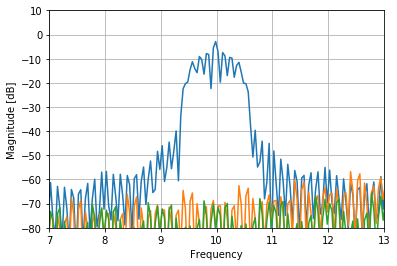

In [21]:
plot_spec(wave_1, 1/P);
plot_spec(wave_2, 1/P, ylim=[-80, 10]);
plot_spec(wave_3, 1/P, ylim=[-80, 10]);
pl.xlim([fc1-3, fc1+3]);
pl.grid()

## 封装 FDM-LS-TR

In [27]:
def fdm_ls_tr(bits1, bits2, bits3, fc1=10, fc2=20, fc3=30, beta1=0.25, beta2=0.25, beta3=0.25):
    '''低频谱旁瓣多路频分复用
    '''
    wave_1 = pam_transmitter(bits1, beta=beta1, fc=fc1)
    wave_2 = pam_transmitter(bits2, beta=beta2, fc=fc2)
    wave_3 = pam_transmitter(bits3, beta=beta3, fc=fc3)
    mod_wave = wave_1 + wave_2 + wave_3
    return mod_wave

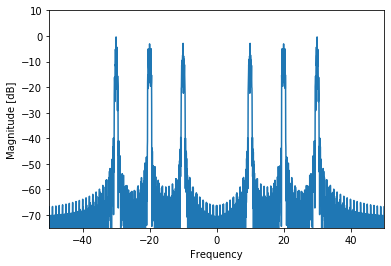

In [28]:
test_wave = fdm_ls_tr(bits_1, bits_2, bits_3)
plot_spec(test_wave, Ti, ylim=[-75, 10]);

## 设计综合
- 是否能做两路信号之间的干扰为0，需要满足什么条件?
- 两路信号的频率间隔最近可以为多少？与 $\beta$ 有何关系?